In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
df=pd.read_csv('20_Victims_of_rape.csv')
df

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0
1046,West Bengal,2009,Victims of Other Rape,2333,0,18,84,1834,391,2333,6
1047,West Bengal,2010,Total Rape Victims,2311,0,22,51,1779,459,2311,0
1048,West Bengal,2010,Victims of Incest Rape,4,0,1,0,2,1,4,0


In [84]:
df.drop(['Subgroup'],axis=1,inplace=True)
df 

,Area_Name,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1045,West Bengal,2009,3,0,0,1,1,1,3,0
1046,West Bengal,2009,2333,0,18,84,1834,391,2333,6
1047,West Bengal,2010,2311,0,22,51,1779,459,2311,0
1048,West Bengal,2010,4,0,1,0,2,1,4,0


In [85]:
df.isnull().sum()


Area_Name                    0
Year                         0
Rape_Cases_Reported          0
Victims_Above_50_Yrs         0
Victims_Between_10-14_Yrs    0
Victims_Between_14-18_Yrs    0
Victims_Between_18-30_Yrs    0
Victims_Between_30-50_Yrs    0
Victims_of_Rape_Total        0
Victims_Upto_10_Yrs          0
dtype: int64

In [86]:
df.head()

,Area_Name,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,0,0,0,0,0,0,0,0


In [87]:
df.tail()

,Area_Name,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
1045,West Bengal,2009,3,0,0,1,1,1,3,0
1046,West Bengal,2009,2333,0,18,84,1834,391,2333,6
1047,West Bengal,2010,2311,0,22,51,1779,459,2311,0
1048,West Bengal,2010,4,0,1,0,2,1,4,0
1049,West Bengal,2010,2307,0,21,51,1777,458,2307,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Area_Name                  1050 non-null   object
 1   Year                       1050 non-null   int64 
 2   Rape_Cases_Reported        1050 non-null   int64 
 3   Victims_Above_50_Yrs       1050 non-null   int64 
 4   Victims_Between_10-14_Yrs  1050 non-null   int64 
 5   Victims_Between_14-18_Yrs  1050 non-null   int64 
 6   Victims_Between_18-30_Yrs  1050 non-null   int64 
 7   Victims_Between_30-50_Yrs  1050 non-null   int64 
 8   Victims_of_Rape_Total      1050 non-null   int64 
 9   Victims_Upto_10_Yrs        1050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 82.2+ KB


In [89]:
df.describe()

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
count,1050.00000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,2005.50000,361.920000,1.866667,23.657143,53.085714,212.937143,60.236190,362.198095,10.415238
std,2.87365,592.180572,4.640286,50.677418,115.127899,350.135760,118.322713,592.418089,19.533134
min,2001.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.00000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000
50%,2005.50000,37.000000,0.000000,3.000000,5.000000,15.500000,4.000000,37.000000,2.000000
75%,2008.00000,527.500000,1.000000,19.000000,42.000000,308.000000,58.750000,531.500000,11.000000
max,2010.00000,3135.000000,43.000000,416.000000,826.000000,1835.000000,811.000000,3136.000000,131.000000


In [90]:
print('length of dataset:',len(df)) 
print('shape of the dataset',df.shape)
print("Number of columns in the dataset:",df.columns)

length of dataset: 1050
shape of the dataset (1050, 10)
Number of columns in the dataset: Index(['Area_Name', 'Year', 'Rape_Cases_Reported', 'Victims_Above_50_Yrs',
       'Victims_Between_10-14_Yrs', 'Victims_Between_14-18_Yrs',
       'Victims_Between_18-30_Yrs', 'Victims_Between_30-50_Yrs',
       'Victims_of_Rape_Total', 'Victims_Upto_10_Yrs'],
      dtype='object')


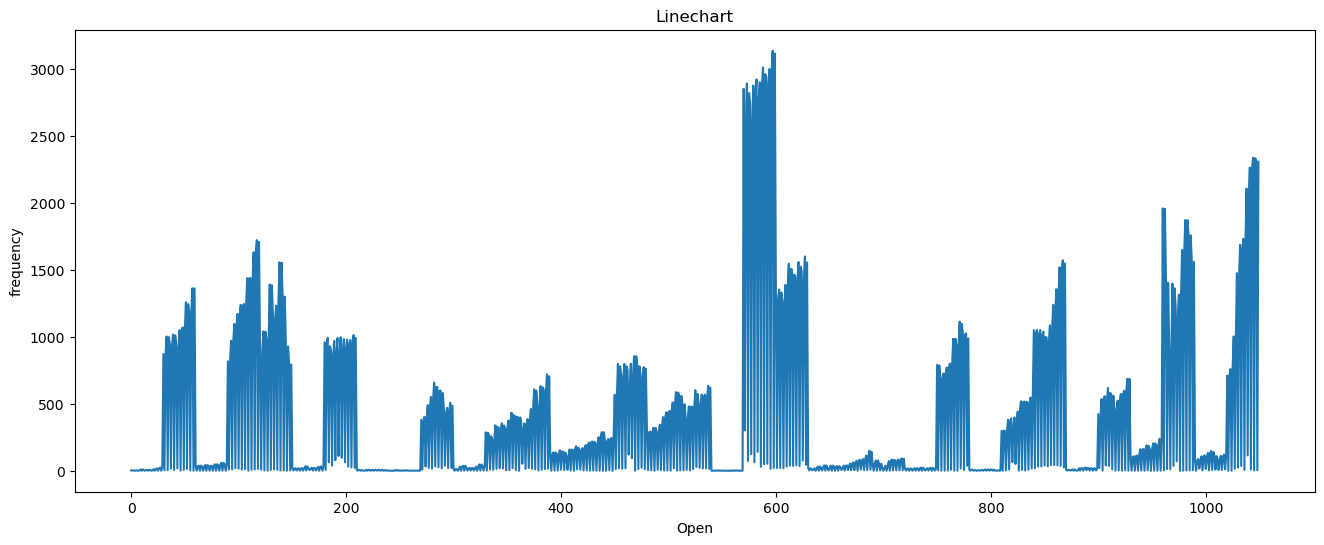

In [91]:
df['Rape_Cases_Reported'].plot(figsize=(16,6)) 
plt.title('Linechart') 
plt.xlabel('Open') 
plt.ylabel('frequency') 
plt.show()

In [92]:
label_encoder=le
df['Area_Name']=le.fit_transform(df['Area_Name'])
df

,Area_Name,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,0,2001,3,0,0,3,0,0,3,0
1,0,2001,1,0,0,1,0,0,1,0
2,0,2001,2,0,0,2,0,0,2,0
3,0,2002,2,0,0,1,1,0,2,0
4,0,2002,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1045,34,2009,3,0,0,1,1,1,3,0
1046,34,2009,2333,0,18,84,1834,391,2333,6
1047,34,2010,2311,0,22,51,1779,459,2311,0
1048,34,2010,4,0,1,0,2,1,4,0


In [93]:
#splitting the dataset 
x=df.drop(['Victims_of_Rape_Total'],axis=1) 
y=df['Victims_of_Rape_Total'] 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
print('xtrain:',x_train.shape) 
print('xtest:',x_test.shape) 
print('ytain:',y_train.shape) 
print('ytest:',y_test.shape)

xtrain: (787, 9)
xtest: (263, 9)
ytain: (787,)
ytest: (263,)


In [94]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Area_Name']=le.fit_transform(df['Area_Name'])
df['Area_Name']

0        0
1        0
2        0
3        0
4        0
        ..
1045    34
1046    34
1047    34
1048    34
1049    34
Name: Area_Name, Length: 1050, dtype: int64

In [95]:
regressor=LinearRegression() 
regressor.fit(x_train,y_train)

LinearRegression()

In [96]:
print('intercept:',regressor.intercept_)
print('Co-efficient:',regressor.coef_)

intercept: 2.7904434318770654e-10
Co-efficient: [ 7.68893723e-15 -1.38999923e-13  1.22124533e-14  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00]


In [97]:
y_pred=regressor.predict(x_test) 
y_pred

array([ 1.80000000e+01,  3.10000000e+01,  3.70000000e+01,  1.30000000e+01,
        2.00000000e+00,  2.40000000e+01,  4.00000000e+00,  4.87899078e-13,
        5.00000000e+00,  4.00000000e+02,  3.60000000e+01,  7.59000000e+02,
        1.30200000e+03,  5.12000000e+02,  1.43700000e+03,  1.90000000e+01,
        1.00000000e+00,  3.70000000e+01, -1.84033724e-13,  1.01800000e+03,
        6.30000000e+01,  1.40000000e+01,  1.20000000e+01,  7.70000000e+01,
        1.36000000e+02,  1.39700000e+03,  2.10000000e+01,  6.03000000e+02,
        7.90000000e+02,  7.70000000e+02,  1.40000000e+01,  1.11000000e+02,
        5.77000000e+02,  2.00000000e+00,  1.00000000e+00,  3.70000000e+01,
        7.00000000e+00,  8.00000000e+00, -1.07144351e-13,  5.55000000e+02,
        1.00000000e+00,  1.45700000e+03,  4.00000000e+00,  4.91000000e+02,
        1.09600000e+03,  6.30000000e+01,  3.00000000e+00,  4.00000000e+00,
        2.01000000e+02,  7.20000000e+01,  5.20000000e+01,  1.62000000e+02,
        3.00000000e+00,  

In [99]:
train_accuracy=regressor.score(x_train,y_train)
print('train_accuracy(R_Squared):',train_accuracy)
test_accuracy=regressor.score(x_test,y_test)
print('test_accuracy(R_Squared):',test_accuracy)
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,y_pred)))

train_accuracy(R_Squared): 1.0
test_accuracy(R_Squared): 1.0


NameError: name 'metrics' is not defined